In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
data_set = pd.read_csv("C:/Sefkan/Mall_Customers.csv")
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
x = data_set["Annual Income (k$)"]
y = data_set["Spending Score (1-100)"]

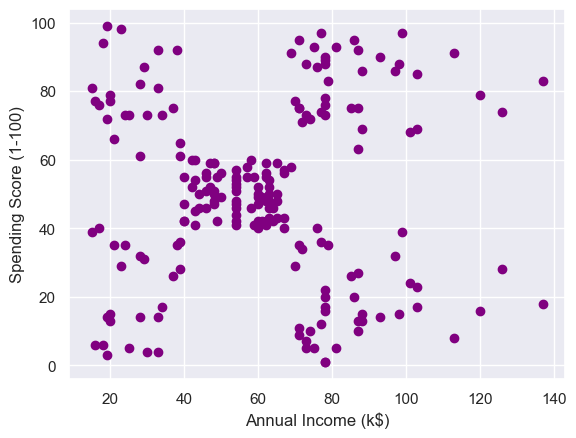

In [3]:
plt.scatter(x,y,color="purple")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Text(0, 0.5, 'Spending Score')

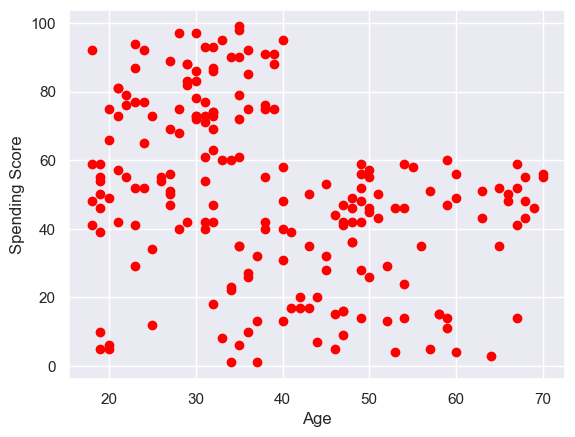

In [4]:
plt.scatter(data_set["Age"], data_set["Spending Score (1-100)"], color="red")
plt.xlabel("Age")
plt.ylabel("Spending Score")

In [5]:
x = data_set[["Spending Score (1-100)","Annual Income (k$)"]]
x.copy()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


In [6]:
from sklearn import preprocessing

x_scale = preprocessing.scale(x)
x_scale

array([[-0.43480148, -1.73899919],
       [ 1.19570407, -1.73899919],
       [-1.71591298, -1.70082976],
       [ 1.04041783, -1.70082976],
       [-0.39597992, -1.66266033],
       [ 1.00159627, -1.66266033],
       [-1.71591298, -1.62449091],
       [ 1.70038436, -1.62449091],
       [-1.83237767, -1.58632148],
       [ 0.84631002, -1.58632148],
       [-1.4053405 , -1.58632148],
       [ 1.89449216, -1.58632148],
       [-1.36651894, -1.54815205],
       [ 1.04041783, -1.54815205],
       [-1.44416206, -1.54815205],
       [ 1.11806095, -1.54815205],
       [-0.59008772, -1.50998262],
       [ 0.61338066, -1.50998262],
       [-0.82301709, -1.43364376],
       [ 1.8556706 , -1.43364376],
       [-0.59008772, -1.39547433],
       [ 0.88513158, -1.39547433],
       [-1.75473454, -1.3573049 ],
       [ 0.88513158, -1.3573049 ],
       [-1.4053405 , -1.24279661],
       [ 1.23452563, -1.24279661],
       [-0.7065524 , -1.24279661],
       [ 0.41927286, -1.24279661],
       [-0.74537397,

C:\Users\dur an\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


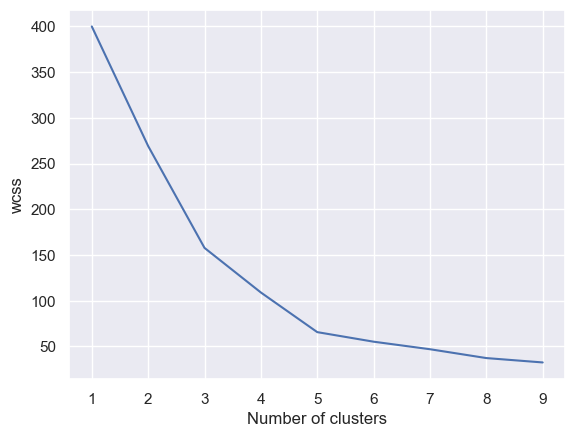

In [7]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(k)
    kmeans.fit(x_scale)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [8]:
kmeans2 = KMeans(3)
kmeans2.fit(x_scale)
clusters = x.copy()
clusters["cluster_pred"] = kmeans2.fit_predict(x_scale)
clusters

,Spending Score (1-100),Annual Income (k$),cluster_pred
0,39,15,0
1,81,15,0
2,6,16,0
3,77,16,0
4,40,17,0
...,...,...,...
195,79,120,1
196,28,126,2
197,74,126,1
198,18,137,2


Text(0, 0.5, 'Spending Score')

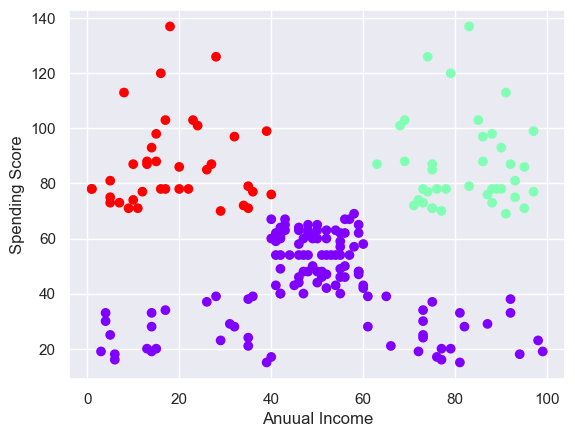

In [9]:
plt.scatter(clusters["Spending Score (1-100)"], clusters["Annual Income (k$)"], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("Anuual Income")
plt.ylabel("Spending Score")